# Data processing and ML model using Open data source

## Content
0. [Importing Libraries](#0-importing-libraries)
1. [Review and clean the data](#1-review-and-clean-the-data)

## 0. Importing Libraries

In [105]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm # OLS model

plt.style.use("ggplot")

## 1. Review and clean the data
We use the dataset avaible on Kaggle for this test/demo. 
According to the Kaggle page, the data is orinially from open data source published on https://transparency.entsoe.eu and https://openweathermap.org/api, that is, we will be able to obtain the latest data from these sources and to expand similar analysis with latest/other EU country data. 

In [82]:
#%pip install kagglehub
#import kagglehub

# Download latest version
#filepath = kagglehub.dataset_download("nicholasjhana/energy-consumption-generation-prices-and-weather")

#print("Path to dataset files:", filepath)
filepath = './Data'

In [83]:
# Read the datasets

df_weather = pd.read_csv(
    os.path.join(filepath, 'weather_features.csv'), 
    parse_dates=['dt_iso'],
    skipinitialspace=True
)

df_energy = pd.read_csv(
    os.path.join(filepath, 'energy_dataset.csv'), 
    parse_dates=['time']
)


In [84]:
df_weather['time'] = pd.to_datetime(df_weather['dt_iso'], utc=True) #, infer_datetime_format=True)
df_weather.dtypes

dt_iso                              object
city_name                           object
temp                               float64
temp_min                           float64
temp_max                           float64
pressure                             int64
humidity                             int64
wind_speed                           int64
wind_deg                             int64
rain_1h                            float64
rain_3h                            float64
snow_3h                            float64
clouds_all                           int64
weather_id                           int64
weather_main                        object
weather_description                 object
weather_icon                        object
time                   datetime64[ns, UTC]
dtype: object

In [85]:
df_weather.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,time
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n,2014-12-31 23:00:00+00:00
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n,2015-01-01 00:00:00+00:00
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n,2015-01-01 01:00:00+00:00
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n,2015-01-01 02:00:00+00:00
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n,2015-01-01 03:00:00+00:00


In [86]:
df_weather.describe().round(2)

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00
mean,289.62,288.33,291.09,1069.26,68.42,2.47,166.59,0.08,0.00,0.00,25.07,759.83
std,8.03,7.96,8.61,5969.63,21.90,2.10,116.61,0.40,0.01,0.22,30.77,108.73
min,262.24,262.24,262.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,200.00
25%,283.67,282.48,284.65,1013.00,53.00,1.00,55.00,0.00,0.00,0.00,0.00,800.00
50%,289.15,288.15,290.15,1018.00,72.00,2.00,177.00,0.00,0.00,0.00,20.00,800.00
75%,295.15,293.73,297.15,1022.00,87.00,4.00,270.00,0.00,0.00,0.00,40.00,801.00
max,315.60,315.15,321.15,1008371.00,100.00,133.00,360.00,12.00,2.32,21.50,100.00,804.00


In [87]:
# df_energy.columns

# Convert time to datetime object and set it as index
df_energy['time'] = pd.to_datetime(df_energy['time'], utc=True) #, infer_datetime_format=True)
#df_energy = df_energy.set_index('time')

df_energy.dtypes

time                                           datetime64[ns, UTC]
generation biomass                                         float64
generation fossil brown coal/lignite                       float64
generation fossil coal-derived gas                         float64
generation fossil gas                                      float64
generation fossil hard coal                                float64
generation fossil oil                                      float64
generation fossil oil shale                                float64
generation fossil peat                                     float64
generation geothermal                                      float64
generation hydro pumped storage aggregated                 float64
generation hydro pumped storage consumption                float64
generation hydro run-of-river and poundage                 float64
generation hydro water reservoir                           float64
generation marine                                          flo

In [88]:
df_energy.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [89]:
df_energy.describe().round(2)

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.00,35046.00,35046.0,35046.00,35046.00,35045.00,35046.0,35046.0,35046.0,0.0,...,35045.00,35046.0,35046.00,35064.00,0.0,35064.00,35064.00,35028.00,35064.00,35064.00
mean,383.51,448.06,0.0,5622.74,4256.07,298.32,0.0,0.0,0.0,NaN,...,269.45,0.0,5464.48,1439.07,NaN,5471.22,28712.13,28696.94,49.87,57.88
std,85.35,354.57,0.0,2201.83,1961.60,52.52,0.0,0.0,0.0,NaN,...,50.20,0.0,3213.69,1677.70,NaN,3176.31,4594.10,4574.99,14.62,14.20
min,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,NaN,...,0.00,0.0,0.00,0.00,NaN,237.00,18105.00,18041.00,2.06,9.33
25%,333.00,0.00,0.0,4126.00,2527.00,263.00,0.0,0.0,0.0,NaN,...,240.00,0.0,2933.00,69.00,NaN,2979.00,24793.75,24807.75,41.49,49.35
50%,367.00,509.00,0.0,4969.00,4474.00,300.00,0.0,0.0,0.0,NaN,...,279.00,0.0,4849.00,576.00,NaN,4855.00,28906.00,28901.00,50.52,58.02
75%,433.00,757.00,0.0,6429.00,5838.75,330.00,0.0,0.0,0.0,NaN,...,310.00,0.0,7398.00,2636.00,NaN,7353.00,32263.25,32192.00,60.53,68.01
max,592.00,999.00,0.0,20034.00,8359.00,449.00,0.0,0.0,0.0,NaN,...,357.00,0.0,17436.00,5836.00,NaN,17430.00,41390.00,41015.00,101.99,116.80


In [90]:
df_energy.isna().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In [91]:
# df_energy[df_energy['generation solar'].isna()]

In [92]:
# drop nan col
#df_energy.dropna(axis=1, inplace=True)

# Fill null values using interpolation
df_energy.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

#df_energy.isna().sum()

In [93]:
# does the solar energy generation stop at night time?
# seems like no...
df_energy[df_energy['generation solar'] <= 0]

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
25125,2017-11-12 20:00:00+00:00,0.0,0.0,0.0,6899.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,36.0,NaN,8536.0,36671.0,36562.0,69.48,67.66
25164,2017-11-14 11:00:00+00:00,0.0,0.0,0.0,10064.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4325.0,NaN,7561.0,33805.0,33970.0,60.53,66.17
25171,2017-11-14 18:00:00+00:00,0.0,0.0,0.0,12336.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,128.0,NaN,5679.0,35592.0,35709.0,68.05,75.45


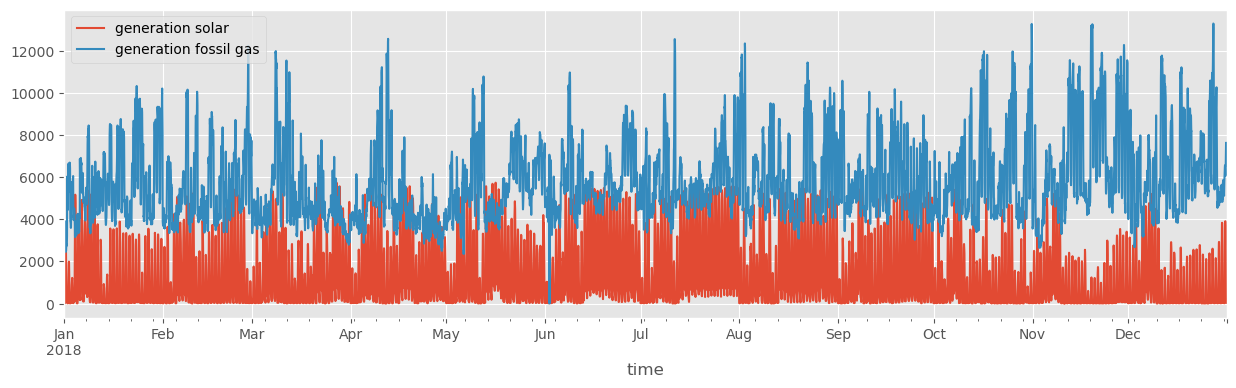

In [94]:
df_energy[df_energy['time'] >= "2018-01-01"].plot(x = 'time', y = ['generation solar','generation fossil gas'],figsize=(15, 4))
plt.show()

/var/folders/qv/t2vwkpks13lc6qj9vrjf5qf80000gn/T/ipykernel_31386/1332631803.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_energy.groupby(pd.Grouper(key='time', axis=0,freq='M')).sum().reset_index().plot(x = 'time', y = ['generation solar','generation fossil gas'],figsize=(15, 4))


<Axes: xlabel='time'>

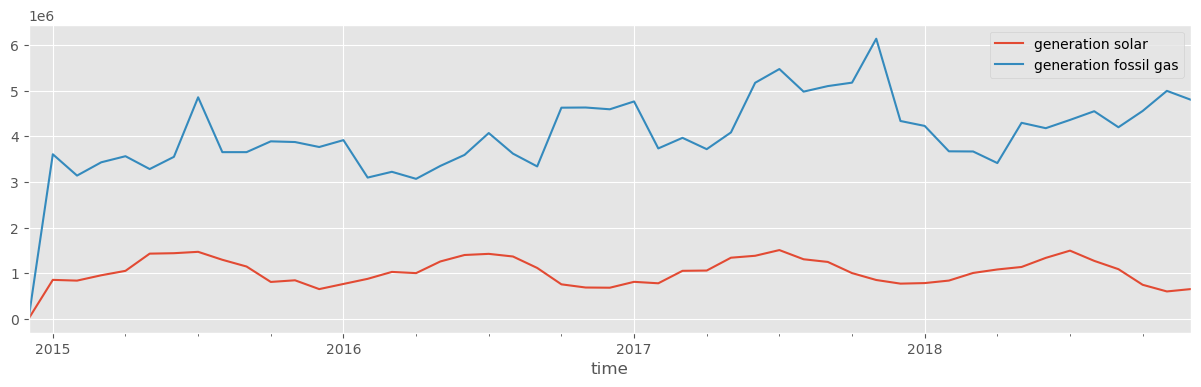

In [95]:
# Monthly total demand
df_energy.groupby(pd.Grouper(key='time', axis=0,freq='M')).sum().reset_index().plot(x = 'time', y = ['generation solar','generation fossil gas'],figsize=(15, 4))

<Axes: xlabel='time'>

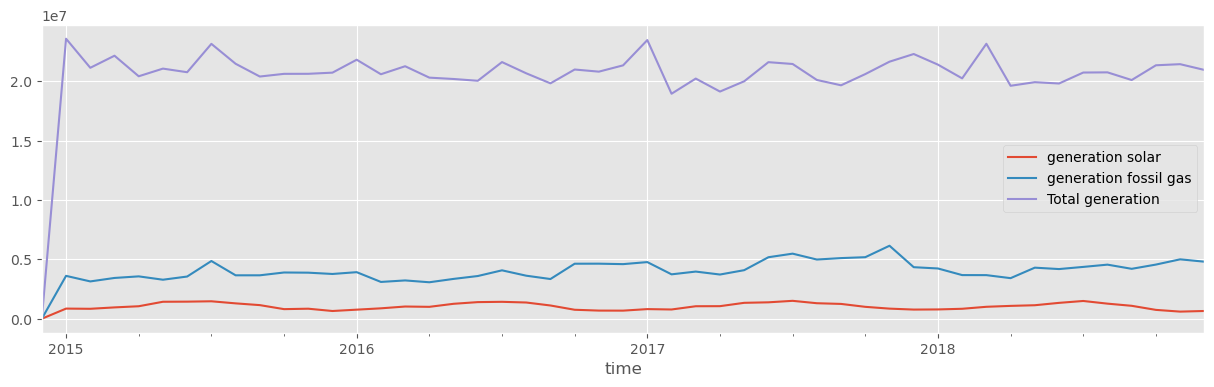

In [96]:
# check the trend of total demand
df_energy['Total generation'] = df_energy[[col for col in df_energy.columns if 'generation' in col]].sum(axis=1)

df_energy.groupby(pd.Grouper(key='time', axis=0,freq='ME')).sum().reset_index().plot(x = 'time', y = ['generation solar','generation fossil gas','Total generation'],figsize=(15, 4))

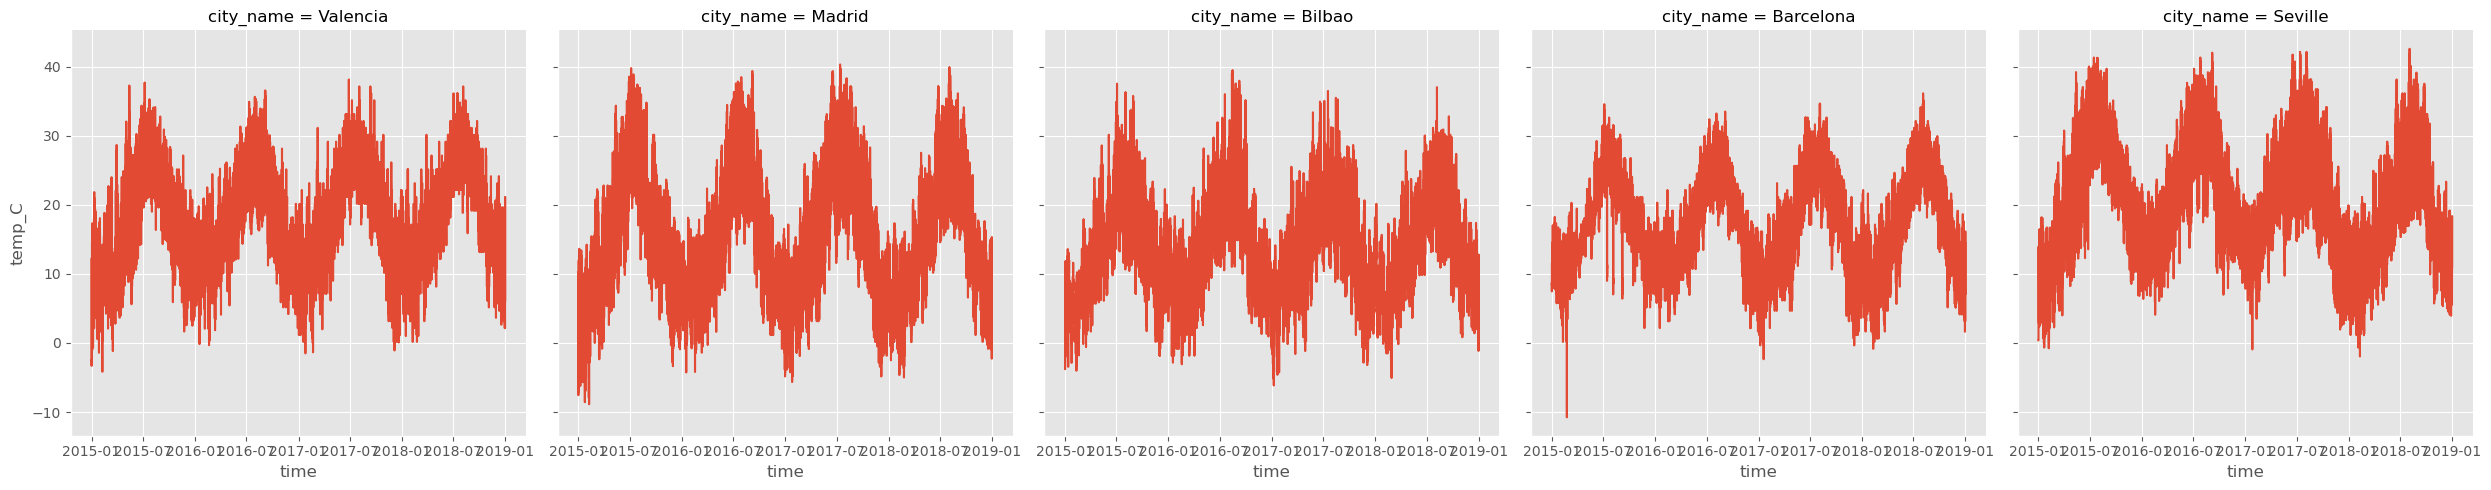

In [97]:
df_weather['temp_C'] = df_weather.temp - 273
cities = df_weather.city_name.unique()

sns.relplot(data=df_weather, x='time', y='temp_C', col='city_name', kind="line")


In [98]:
df_weather.duplicated(keep='first').sum()

# Create df_weather_2 and drop duplicate rows in df_weather
df_weather = df_weather.drop_duplicates(subset=['time', 'city_name'], keep='first').set_index('time').reset_index()

df_weather.duplicated(keep='first').sum()
df_weather

,time,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,temp_C
0,2014-12-31 23:00:00+00:00,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n,-2.525
1,2015-01-01 00:00:00+00:00,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n,-2.525
2,2015-01-01 01:00:00+00:00,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n,-3.314
3,2015-01-01 02:00:00+00:00,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n,-3.314
4,2015-01-01 03:00:00+00:00,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n,-3.314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175315,2018-12-31 18:00:00+00:00,2018-12-31 19:00:00+01:00,Seville,287.760,287.150,288.150,1028,54,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n,14.760
175316,2018-12-31 19:00:00+00:00,2018-12-31 20:00:00+01:00,Seville,285.760,285.150,286.150,1029,62,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n,12.760
175317,2018-12-31 20:00:00+00:00,2018-12-31 21:00:00+01:00,Seville,285.150,285.150,285.150,1028,58,4,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n,12.150
175318,2018-12-31 21:00:00+00:00,2018-12-31 22:00:00+01:00,Seville,284.150,284.150,284.150,1029,57,4,60,0.0,0.0,0.0,0,800,clear,sky is clear,01n,11.150


In [109]:
# reshape from long to wide for ML model
df_weather_2 = df_weather[['time','city_name','temp','pressure','humidity','wind_speed','rain_1h','snow_3h','clouds_all']].pivot(columns = 'city_name', index = 'time')

df_weather_2.columns = ["_".join((i,j)) for i,j in df_weather_2.columns]
df_weather_2 = df_weather_2.reset_index()

df_weather_2.head()

,time,temp_Barcelona,temp_Bilbao,temp_Madrid,temp_Seville,temp_Valencia,pressure_Barcelona,pressure_Bilbao,pressure_Madrid,pressure_Seville,...,snow_3h_Barcelona,snow_3h_Bilbao,snow_3h_Madrid,snow_3h_Seville,snow_3h_Valencia,clouds_all_Barcelona,clouds_all_Bilbao,clouds_all_Madrid,clouds_all_Seville,clouds_all_Valencia
0,2014-12-31 23:00:00+00:00,281.625,269.657312,267.325,273.375,270.475,1035,1036,971,1039,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,2015-01-01 00:00:00+00:00,281.625,269.763500,267.325,273.375,270.475,1035,1035,971,1039,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,2015-01-01 01:00:00+00:00,281.286,269.251688,266.186,274.086,269.686,1036,1036,971,1039,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,2015-01-01 02:00:00+00:00,281.286,269.203344,266.186,274.086,269.686,1036,1035,971,1039,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
4,2015-01-01 03:00:00+00:00,281.286,269.485500,266.186,274.086,269.686,1036,1035,971,1039,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


In [ ]:
print(df_energy.shape)
print(df_weather_2.shape)

(35064, 30)
(35064, 36)


## 2. Models

### 2.1 OLS / Linear Regression

#### 2.1.1 Generation solar vs everything

In [110]:
X = df_weather_2[[i for i in df_weather_2.columns if i != "time"]]
y = df_energy["generation solar"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:       generation solar   R-squared (uncentered):                   0.666
Model:                            OLS   Adj. R-squared (uncentered):              0.666
Method:                 Least Squares   F-statistic:                              2118.
Date:                Sun, 08 Dec 2024   Prob (F-statistic):                        0.00
Time:                        23:37:25   Log-Likelihood:                     -3.0051e+05
No. Observations:               35064   AIC:                                  6.011e+05
Df Residuals:                   35031   BIC:                                  6.014e+05
Df Model:                          33                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

#### 2.1.2 Generation solar vs only the cloud coverage. 
cloud_all = cloud cover in %
so 0 means no cloud, and 100 means cloudy. that I would expect when cloud_all is smaller, the generation solar is larger. 
that negative coef for all cloud_all_< city > is expected but is not the case here. 

"time" data is not used here. 

if we want to see how the weather impact solar energy generation, 
Maybe we should also grab the sunrise sunset time and/or the UV data?


In [111]:
X = df_weather_2[[i for i in df_weather_2.columns if "clouds" in i]]
y = df_energy["generation solar"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:       generation solar   R-squared (uncentered):                   0.286
Model:                            OLS   Adj. R-squared (uncentered):              0.286
Method:                 Least Squares   F-statistic:                              2806.
Date:                Mon, 09 Dec 2024   Prob (F-statistic):                        0.00
Time:                        12:01:42   Log-Likelihood:                     -3.1384e+05
No. Observations:               35064   AIC:                                  6.277e+05
Df Residuals:                   35059   BIC:                                  6.277e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------